In [74]:
import pandas as pd

dados = pd.read_excel("C:/Users/Salomão/Downloads/Recrutamento.xlsx")

In [75]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [76]:
dados.shape

(215, 15)

In [77]:
set(dados.status)

{'No', 'Yes'}

In [78]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [79]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [80]:
import missingno as msno

<Axes: >

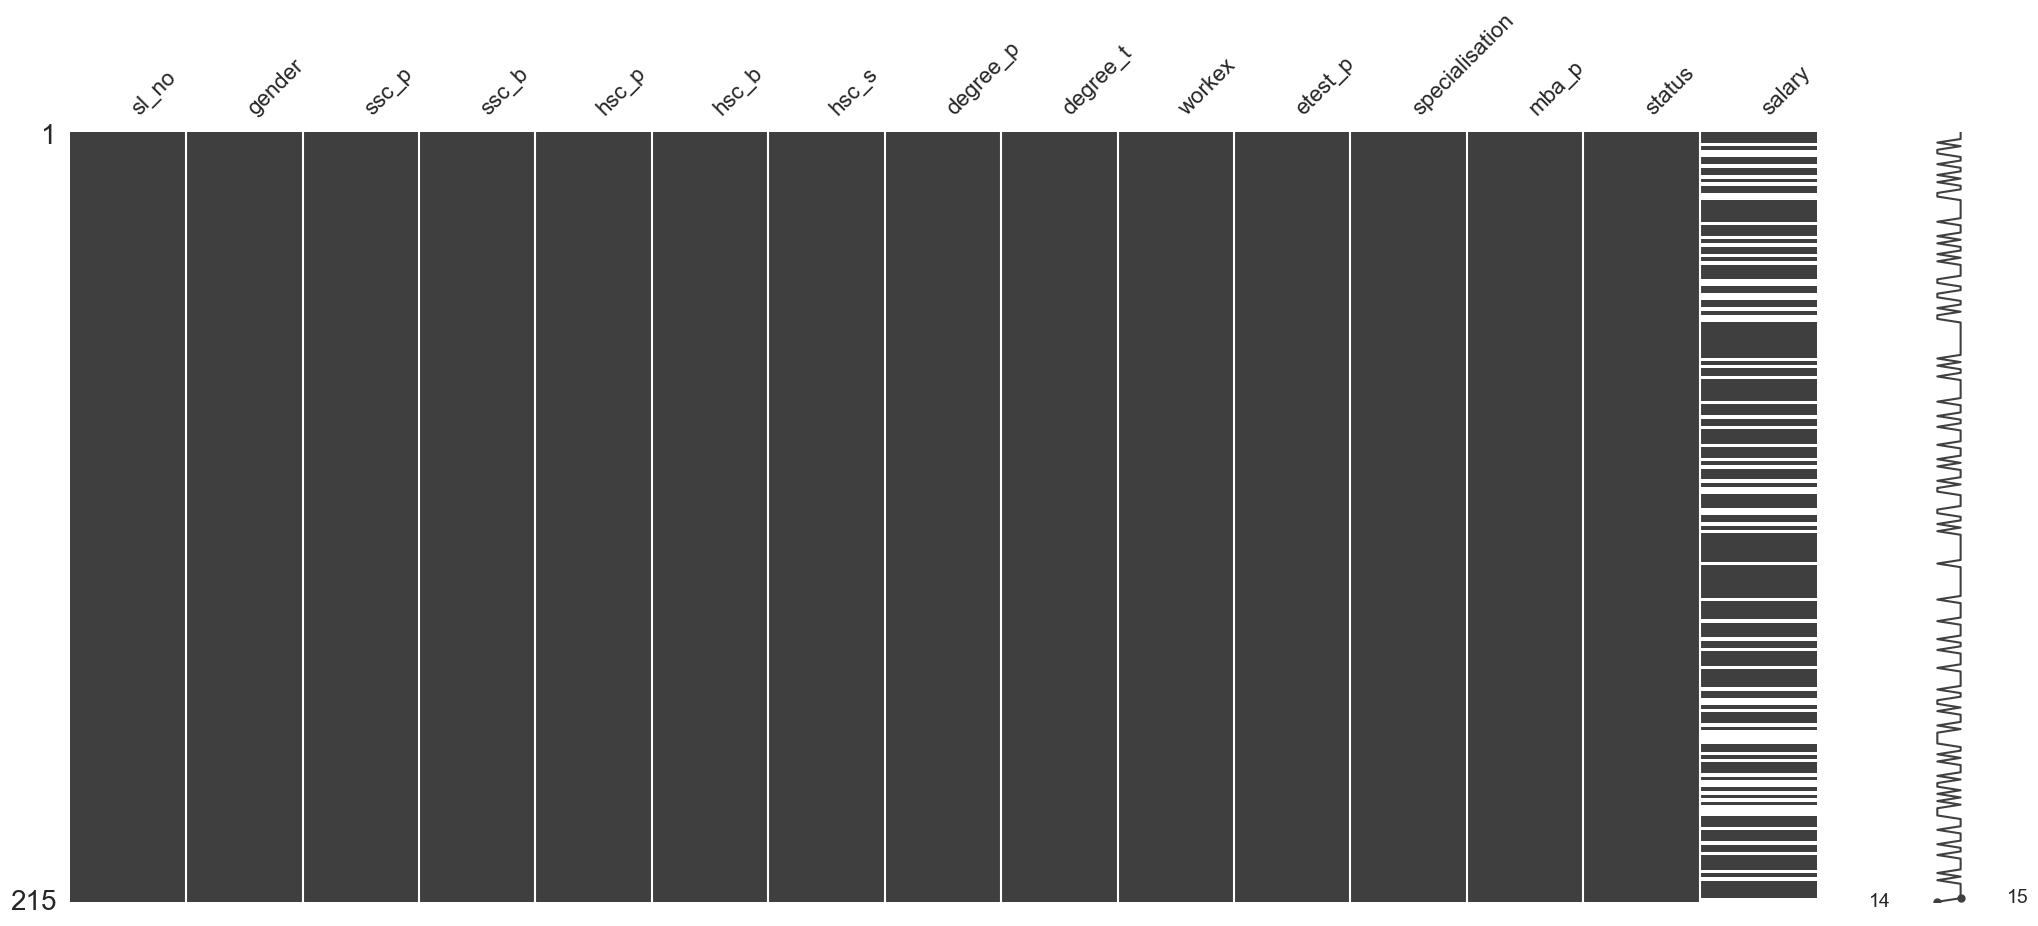

In [81]:
msno.matrix(dados)#nulos na coluna salary

In [82]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [83]:
import seaborn as sns

C:\Users\Salomão\AppData\Local\Temp\ipykernel_24712\2886275892.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='status', ylabel='salary'>

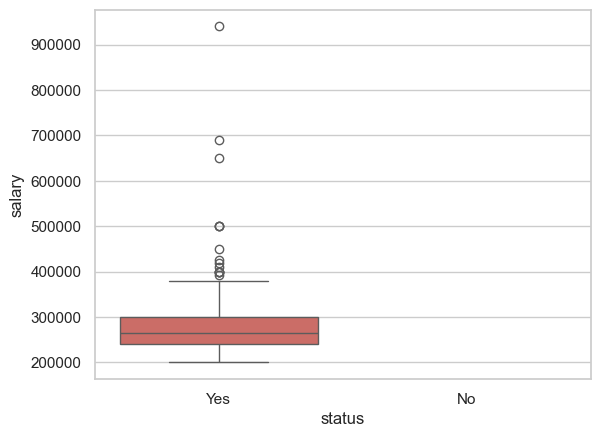

In [84]:
sns.boxplot(x='status',y='salary',data=dados,palette='hls')

Vimos que o salário está presente somente para contratados, portanto, é o salário das pessoas que entraram na empresa .

In [86]:
dados['salary'].fillna(value=0,inplace=True)

In [87]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Valores nulos na coluna salário foram preenchidos com zero

<Axes: xlabel='hsc_p'>

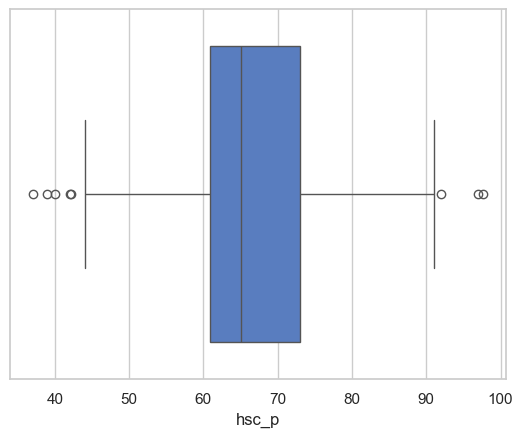

In [89]:
sns.boxplot(x='hsc_p',data=dados)

<Axes: xlabel='hsc_p', ylabel='Count'>

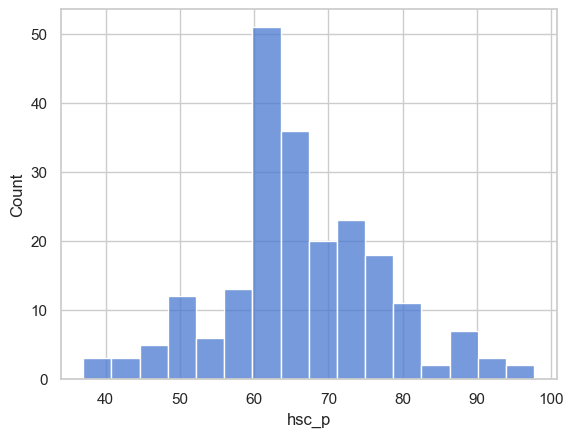

In [90]:
sns.histplot(x='hsc_p',data=dados)

<Axes: xlabel='degree_p'>

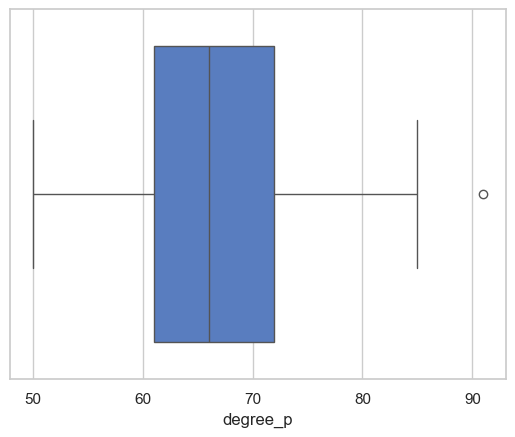

In [91]:
sns.boxplot(x=dados['degree_p'])

<Axes: xlabel='degree_p', ylabel='Count'>

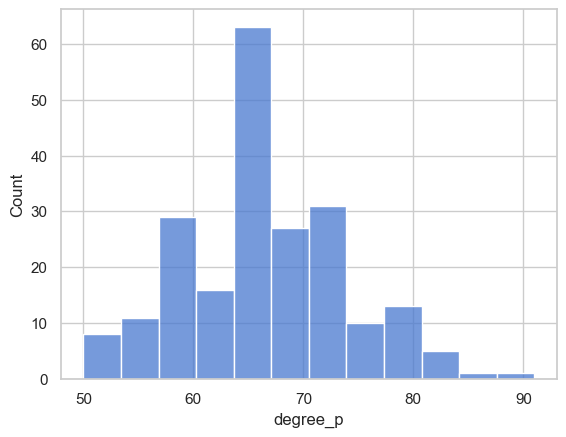

In [92]:
sns.histplot(x=dados['degree_p'])

<Axes: xlabel='etest_p'>

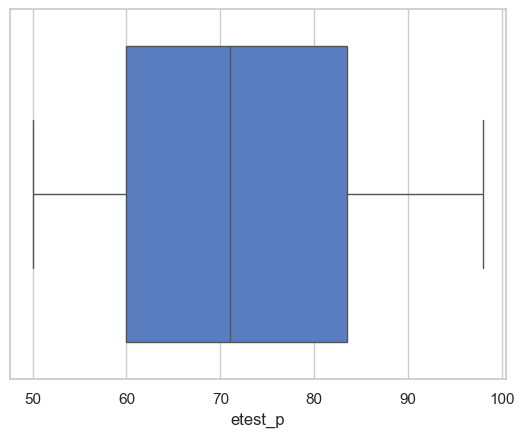

In [93]:
sns.boxplot(x=dados['etest_p'])

<Axes: xlabel='mba_p'>

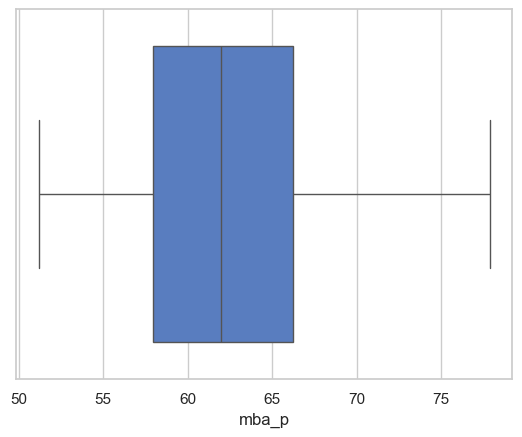

In [94]:
sns.boxplot(x=dados['mba_p'])

<Axes: xlabel='salary'>

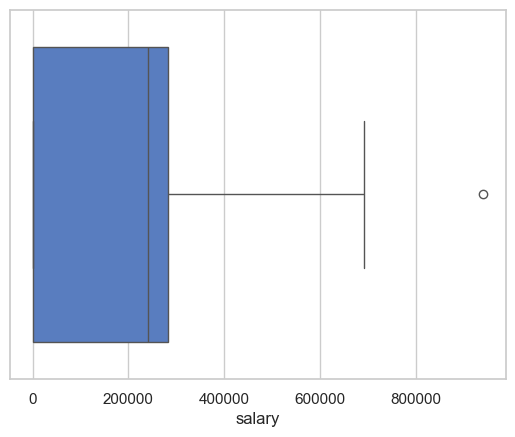

In [95]:
sns.boxplot(x=dados['salary'])

<Axes: xlabel='salary', ylabel='Count'>

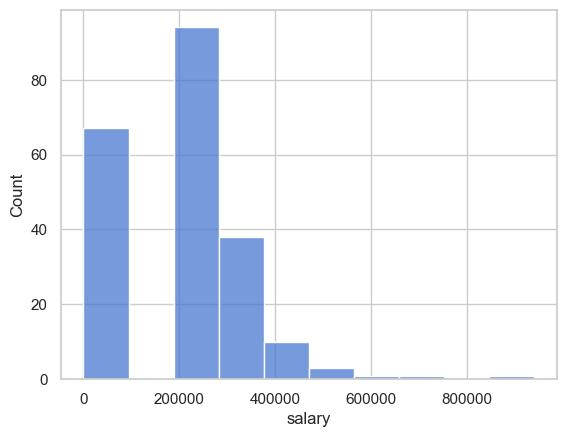

In [96]:
sns.histplot(x=dados['salary'])

[Text(36.25, 0.5, 'mba_p')]

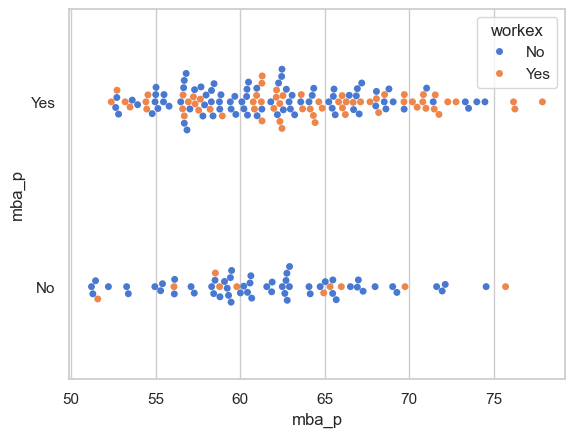

In [97]:
sns.set_theme(style='whitegrid',palette='muted')
ax=sns.swarmplot(data=dados,x='mba_p',y='status',hue='workex')
ax.set(ylabel='mba_p')

In [98]:
import plotly_express as px

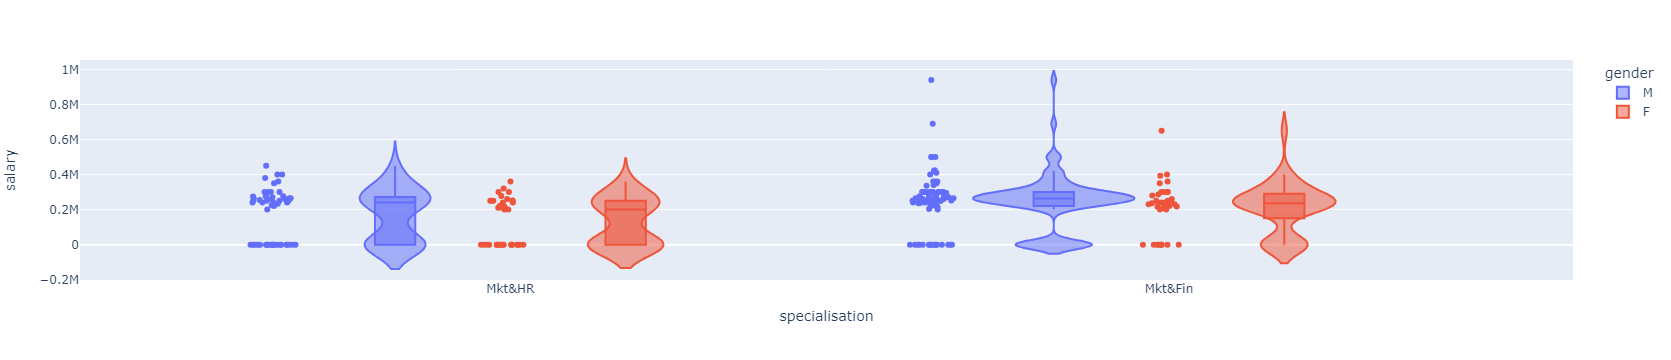

In [99]:
px.violin(dados, y='salary',x='specialisation',color='gender', box = True,points='all')

<Axes: >

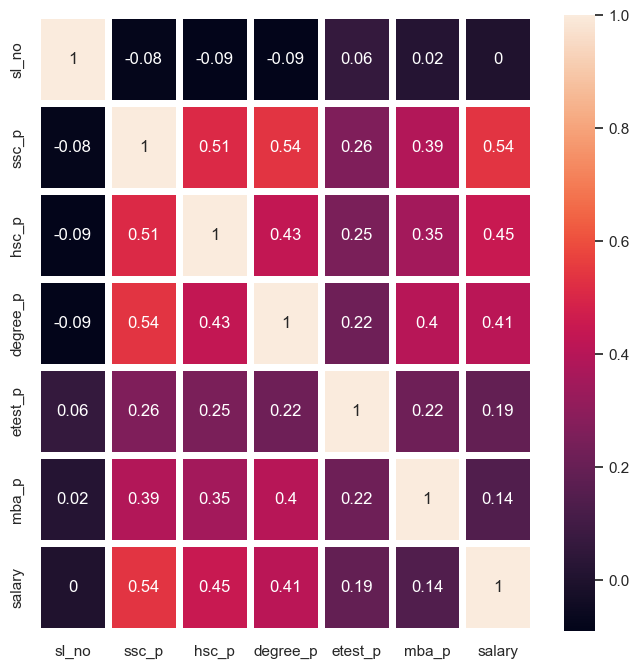

In [100]:
import matplotlib.pyplot as plt 

correlation_matrix = dados.corr(numeric_only=True).round(2)


fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data=correlation_matrix,annot=True,linewidths=5,ax=ax)

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [103]:
colunas = ['gender','workex','specialisation','status']
#label encoder transforma colunas categóricas em numéricas
label_encoder = LabelEncoder() 
for col in colunas:
    dados[col] = label_encoder.fit_transform(dados[col])

In [104]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [105]:
dummy_hsc_s = pd.get_dummies(dados['hsc_s'],prefix='dummy')
dummy_degree_t = pd.get_dummies(dados['degree_t'],prefix='dummy')

dados_dummy = pd.concat([dados,dummy_hsc_s,dummy_degree_t],axis=1)

In [106]:
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,...,1,59.43,0,0.0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,...,0,55.50,1,425000.0,False,True,False,True,False,False


In [107]:
dados_dummy.drop(columns=['hsc_s','degree_t','salary' ],axis=1,inplace=True)

In [108]:
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


<Axes: >

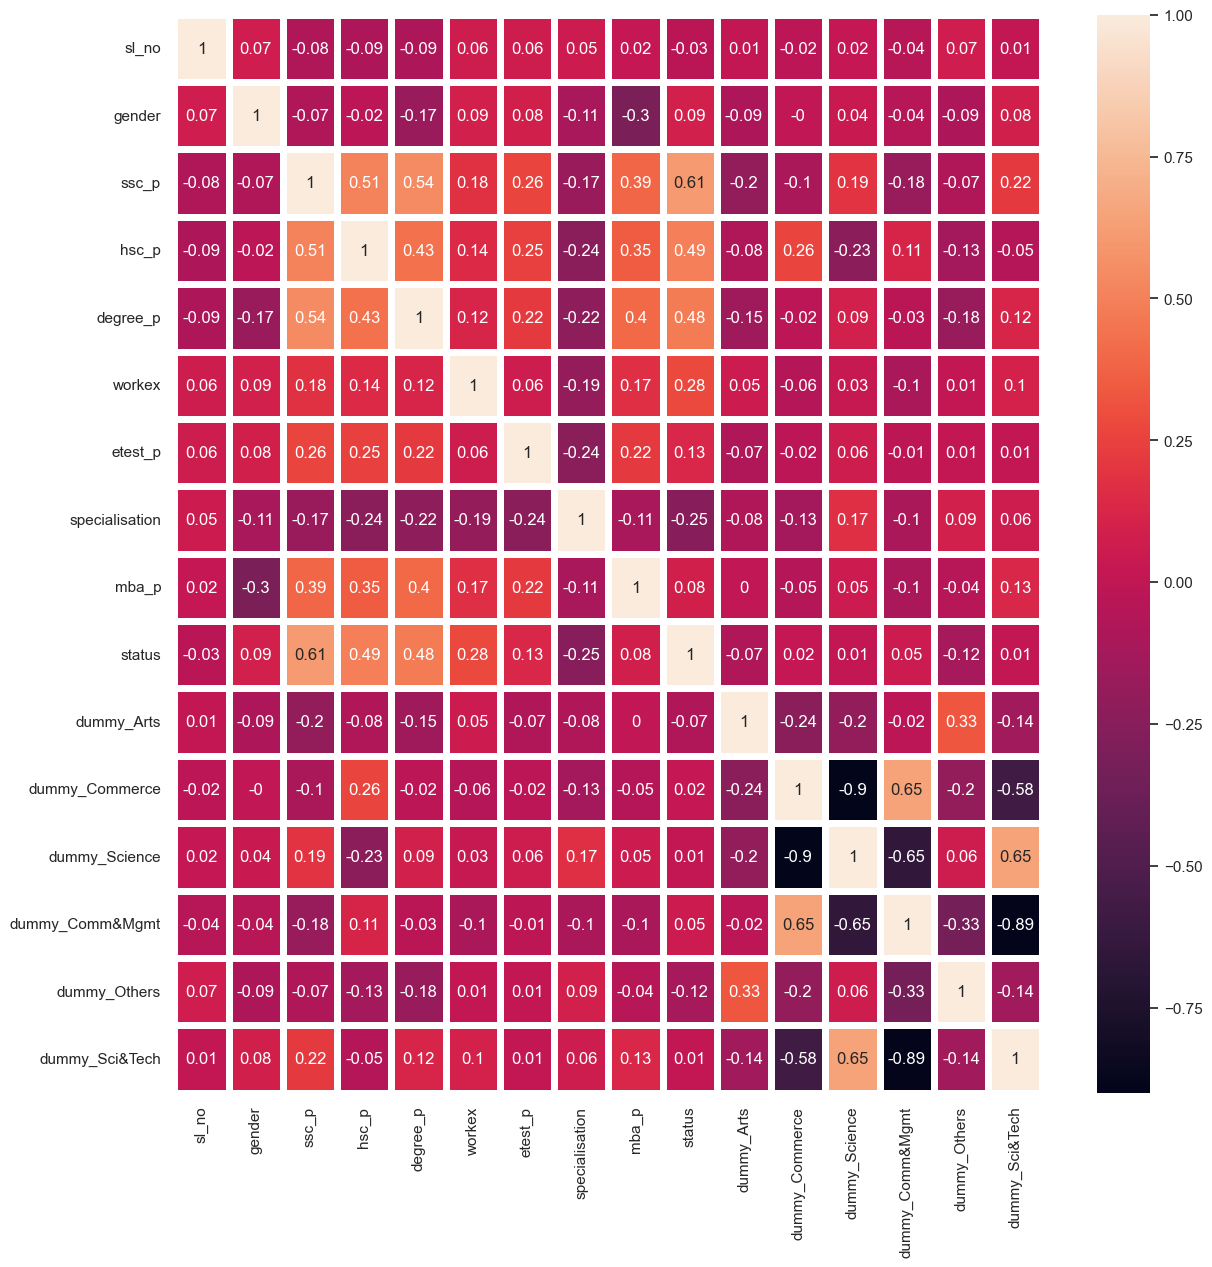

In [110]:
correlation_matrix = dados_dummy.select_dtypes(include=[float,bool,int]).corr().round(2)


fig, ax = plt.subplots(figsize=(14,14))

sns.heatmap(data=correlation_matrix,annot=True,linewidths=5,ax=ax)

In [112]:
x = dados_dummy[['ssc_p','hsc_p','degree_p','workex','mba_p']]
y = dados_dummy['status']

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [116]:
seed = 7
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=seed,test_size=0.2,stratify=y)

In [120]:
x_train.shape

(172, 5)

In [122]:
x_test.shape

(43, 5)

In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [128]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [138]:
import numpy as np

In [140]:
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    pred_i = knn.predict(x_test_scaled)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Erro médio')

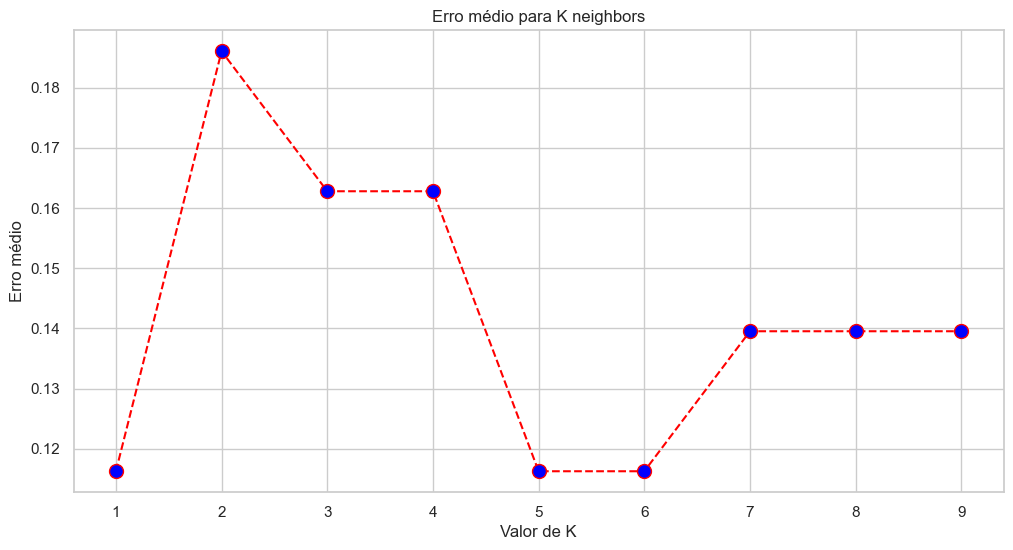

In [146]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10),error,color = 'red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Erro médio para K neighbors")
plt.xlabel("Valor de K")
plt.ylabel("Erro médio")

O gráfico acima ajuda a decidir quantos neighbors usar no modelo para melhor performance

In [148]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_scaled,y_train) 

y_predicted = modelo_classificador.predict(x_test_scaled) 

In [150]:
from sklearn.metrics import accuracy_score

In [160]:
print("A acurácia do modelo KNN (em %) foi de ", (accuracy_score(y_test,y_predicted)*100))

A acurácia do modelo KNN (em %) foi de  88.37209302325581


In [164]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [166]:
svm = Pipeline(
    [
        ("linear_svc",LinearSVC(C=1))#C=margem de separação dos dados
    ]
)

In [170]:
svm.fit(x_train_scaled,y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [172]:
y_predicted_svm = svm.predict(x_test_scaled)

In [174]:
print("A acurácia do modelo SVM (em %) foi de ", (accuracy_score(y_test,y_predicted_svm)*100))

A acurácia do modelo SVM (em %) foi de  86.04651162790698
